### Task 2 Is Rectangle?

In this task, we are given 4 integer numbers as input and are asked to verify if they represent a rectangle or not. For any 4 numbers to represent a rectangle opposite sides should be equal. So there should be 2 pairs of equal numbers. For example, if given numbers are 2, 3, 4, 5. We can not use any 2 numbers to represent the sides of a rectangle because none of them are equal. On the other hand, if the input is 2, 3, 2, 3, there are 2 pairs of equal numbers (2, 2) and (3, 3). For this task we will consider Square as a Rectangle as well. So if all sides are equal we will return True.

We need to make a comparator for 2 numbers first. To compare any 2 numbers we will convert the numbers into the binary strings and compare there bits. For 2 numbers to be equal there binary strings will be equal to each other as well. For example, binary string for 8 is '1000' and if we compare this to 7 ('0111'), none of the bits match but if we compare it to another 8 there strings will match bit by bit.

According to the Truth table of a CNOT gate given below, if the 2 Input are equal Output 2 is always 0 and when the 2 Input are different Output 2 is always 1.
| Input 1 | Input 2 | Output 1 | Output 2 |
|:-----|:-----|:------|:------|
|0|0|0|0|
|0|1|0|1|
|1|0|1|1|
|1|1|1|0|

So we can use $\text{CNOT}$ gate to compare any 2 bits. If we run a loop over the binary strings and use them as input to the Gate we can get the output for each bit comparison.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.providers.aer import QasmSimulator
import math
simulator = QasmSimulator()

Below function represent the circuit to compare 2 bits just like given below and saves the output from the second qubit into classical bit $c0$.

$$ \text{CNOT}( |0\rangle \otimes |0\rangle ) \equiv |00\rangle $$
$$ \text{CNOT}( |0\rangle \otimes |1\rangle ) \equiv |01\rangle $$
$$ \text{CNOT}( |1\rangle \otimes |0\rangle ) \equiv |11\rangle $$
$$ \text{CNOT}( |1\rangle \otimes |1\rangle ) \equiv |10\rangle $$

In [2]:
def bit_comparator(bit1, bit2):
    """
    Creates the circuit to compare 2 bit 1's or 0's and 
    returns the circuit.
    """
    
    circuit = QuantumCircuit(2, 1)
    
    if str(bit1) == '1':
        circuit.x(0)
    if str(bit2) == '1':
        circuit.x(1)
    
    circuit.cx(0, 1)

    circuit.measure([1], [0])

    return circuit

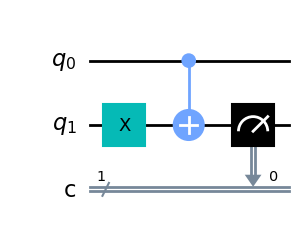

In [3]:
bit_comparator('0', '1').draw('mpl')

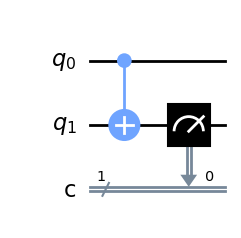

In [4]:
bit_comparator('0', '0').draw('mpl')

Now, we will combine the multiple circuit of this kind and compare whole binary strings. And save the output of the second qubit of each unit in a classical bit.


In [5]:
def binary_comparator(value1, value2):
    """
    Takes binary strings as an input. Designs a circuit using NOT and CNOT gate 
    to compare each bit of the number and returns it.
    """
    
    number_of_qubits = 2 * len(value1)
    number_of_cqubits = len(value1)
    
    qreg_q = QuantumRegister(number_of_qubits, 'q')
    creg_c = ClassicalRegister(number_of_cqubits, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    for i in range(0, number_of_cqubits):
        if value1[i] == '1':
            circuit.x(2*i)
        
        if value2[i] == '1':
            circuit.x(qreg_q[2*i+1])
        
        circuit.cx(qreg_q[2*i], qreg_q[2*i+1])
    
    circuit.measure(list(range(1, number_of_qubits, 2)), list(range(number_of_cqubits)))
    
    return circuit

To prepare the input for this circuit we need to scan through the binary strings. If the 2 numbers are 2 $(|10\rangle)$ and 3 $(|11\rangle)$ then there combined state for this circuit will be as given below

$$|q0q1\rangle = |11\rangle $$
$$|q2q3\rangle = |01\rangle $$

First bit of both binary strings and then second bit of both strings. There output will be stored in $c0$ and $c1$ respectively as below.

$$c0c1 = 01$$

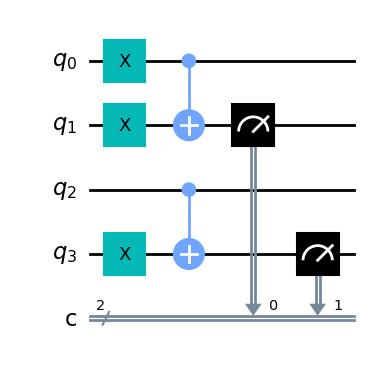

In [6]:
binary_comparator('10', '11').draw('mpl')

Similarily, in the below circuit we have,

$$|q0q1\rangle = |11\rangle $$
$$|q2q3\rangle = |00\rangle $$
$$c0c1 = 00$$

Output of the below circuit does not contain any 1's because both binary strings are exactly same.

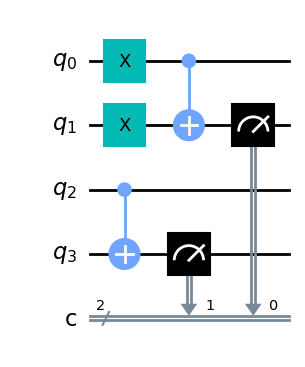

In [7]:
binary_comparator('10', '10').draw('mpl')

In [8]:
def compare_bits(value1, value2, bitwise=True):
    """
    Execute the circuit to compare the bit values and returns the result
    Parameter:
    value1: binary string for side 1
    value2: binary string for side 2
    bitwise: option to choose the circuit, if True a new circuit will
    be created for each bit otherwise whole circuit will be created at once
    """
    
    if bitwise:
        result = []

        for i in range(len(value1)):
            
            circuit = bit_comparator(value1[i], value2[i])
            result.append(list(execute(circuit, backend=simulator, shots = 2**12).result().get_counts().keys())[0])

    else:
        circuit = binary_comparator(value1, value2)
        result = list(execute(circuit, backend = simulator, shots = 2**12).result().get_counts().keys())[0]
    
    return result

In [9]:
def compare_sides(number1, number2, bitwise=True):
    """
    Compare the numbers: number1, number2
    """
    
    # maximum number of bits required to encode sides
    m = max(number1, number2)
    size_value = math.floor(math.log2(m)) + 1

    # convert the number to binary string
    value1 = bin(number1)[2:].zfill(size_value)
    value2 = bin(number2)[2:].zfill(size_value)
    
    # compare the sides
    result = compare_bits(value1, value2, bitwise=bitwise)
    
    if '1' in result:
        return 0
    else:
        return 1

In [10]:
compare_sides(2, 20, bitwise=False)

0

Now the basic functions are complete we can try few examples. If we want to compare 0 and 2, their binary strings will be '00' and '10' respectively. Now, there are 2 options either we compare the bits one by one like first bits of each '0' and '1' then the second bits of each '0' and '0' or we create a circuit which takes 4 bits as input and returns the comparison results. We will see each one by one.

Lets compare the bits one by one first. Below is a circuit to compare 2 bits (0, 1) its output is saved as a classical bit. The circuit returns 0 if the 2 bits are equal otherwise 1.

Output: ['1']


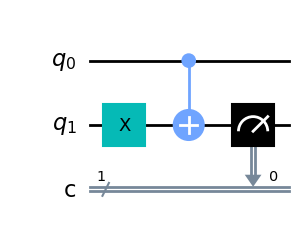

In [11]:
print("Output:", compare_bits('0', '1'))
bit_comparator('0', '1').draw('mpl')

This circuit compares (0, 0) and the output can be seen as 0.

Output: ['0']


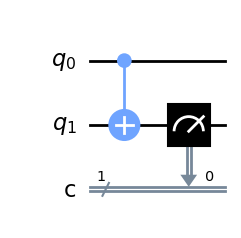

In [12]:
print("Output:", compare_bits('0', '0'))
bit_comparator('0', '0').draw('mpl')

Now, we will see the example of a complete circuit. Below a circuit can be seen which takes 4 inputs $(q0, q1, q2, q3)$ and saves the input as a classical bits $(c0, c1)$. Output will be a string of 0's and 1's where 0 represent that the bit values at that index were same and 1 represent that they were different. So, if the 2 numbers are equal each bit of those 2 numbers will return 0 and the result will be a string of 0's otherwise we can say that the numbers are not equal to each other.

Output: dict_keys(['01'])


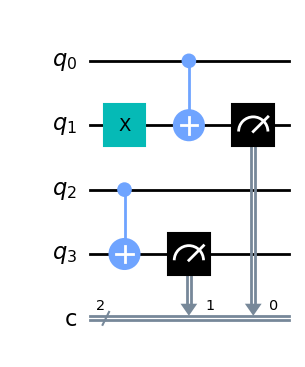

In [13]:
circuit = binary_comparator('00', '10')
result = execute(circuit, backend = simulator, shots = 2**12).result()
print("Output:", result.get_counts().keys())
circuit.draw('mpl')

In this example, we can see that comparison of '10' and '10' returns a string '00'. They both represent 3.

Output: dict_keys(['00'])


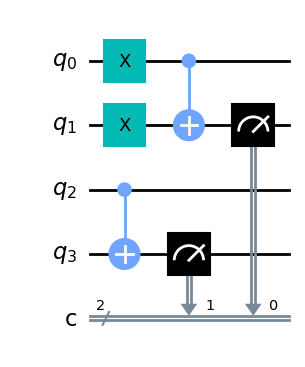

In [14]:
circuit = binary_comparator('10', '10')
result = execute(circuit, backend = QasmSimulator(), shots = 2**12).result()
print("Output:", result.get_counts().keys())
circuit.draw('mpl')

Now to verify weather the given numbers represent the sides of the rectangle we have created below functions. This function takes 4 sides as an input and compares them with each other. In total, there will be 6 comparisons:
<br>1. a compared to b, c, d
<br>2. b compared to c, d
<br>3. c compared to d

And for a rectangle exactly 2 pairs will match. In another case, if it is a Square, all 6 pairs will return True.

In [15]:
def is_rectangle(a, b, c, d, bitwise=True):
    """
    Function takes 4 numbers and verifies if those numbers can be the 
    sides of a rectangle. 
    parameters: a, b, c, d: 4 sides
    returns: '1' if sides represents a rectangle otherwise '0'
    """
    
    equal_sides = 0
    sides = [a, b, c, d]
    
    for i, side1 in enumerate(sides):
        for side2 in sides[i+1:len(sides)]:
            result = compare_sides(side1, side2, bitwise=bitwise)
            if result:
                equal_sides += 1
    
    if equal_sides == 2 or equal_sides == 6:
        return '1'
    else:
        return '0'

### Testing

In [16]:
def is_rectangle_classical(a, b, c, d):
    """
    Function takes 4 numbers and verifies if those numbers can be the 
    sides of a rectangle. 
    parameters: a, b, c, d: 4 sides
    returns: '1' if sides represents a rectangle otherwise '0'
    """
    
    equal_sides = 0
    sides = [a, b, c, d]
    
    for i, side1 in enumerate(sides):
        for side2 in sides[i+1:len(sides)]:
            if side1 == side2:
                equal_sides += 1
    
    if equal_sides == 2 or equal_sides == 6:
        return '1'
    else:
        return '0'

In [17]:
import random

def test(num_test):
    
    success = 0
    failure = 0

    for i in range(num_test):
        sides = list()
        for i in range(4):
            n = random.randint(1,30)
            sides.append(n)

        quantum_result = is_rectangle(sides[0], sides[1], sides[2], sides[3])
        classical_result = is_rectangle_classical(sides[0], sides[1], sides[2], sides[3])

        if quantum_result == classical_result:
            success += 1
        else:
            failure += 1
        
    return {"Success": success, "Failure": failure}

In [18]:
test(1000)

{'Success': 1000, 'Failure': 0}